In [3]:
import pandas as pd 
import numpy as np

df=pd.read_csv("fea.csv",header=None)

In [4]:

for i in range(len(df)):
    # Get the vector from the current row
    vector = df.iloc[i].values
    
    # Compute the Euclidean length of the vector
    length = np.sqrt(np.sum(vector ** 2))
    
    # Normalize the vector by dividing each element by the length
    normalized_vector = vector / length
    
    # Replace the original vector in the dataset with the normalized vector
    df.iloc[i] = normalized_vector
normalized_vector

array([0.01565356, 0.01304464, 0.01130535, ..., 0.01739285, 0.0226107 ,
       0.01478392])

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.021796,0.028023,0.028023,0.029891,0.031137,0.032382,0.033628,0.037364,0.037987,0.040478,...,0.004359,0.003736,0.004359,0.003736,0.003736,0.004982,0.004982,0.005605,0.005605,0.005605
1,0.006237,0.005757,0.005277,0.006237,0.005277,0.005757,0.005277,0.005757,0.007676,0.010555,...,0.022549,0.032623,0.035502,0.030704,0.034063,0.034542,0.034542,0.032144,0.029745,0.027826
2,0.007085,0.008856,0.011808,0.014169,0.015941,0.017712,0.024796,0.028339,0.028929,0.033652,...,0.003542,0.003542,0.007085,0.010037,0.008856,0.005904,0.005314,0.005314,0.004723,0.004133
3,0.004458,0.003962,0.003467,0.003467,0.003962,0.004458,0.007430,0.009411,0.014364,0.016841,...,0.060923,0.026747,0.004953,0.004953,0.004953,0.003467,0.002972,0.003467,0.003467,0.008916
4,0.044881,0.044093,0.044093,0.044093,0.044093,0.042518,0.045668,0.046455,0.046455,0.045274,...,0.025590,0.024409,0.023228,0.020866,0.019291,0.017322,0.014567,0.014173,0.014567,0.016535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.028712,0.028712,0.028712,0.031902,0.030838,0.031902,0.031902,0.029775,0.031902,0.039345,...,0.008507,0.005317,0.006380,0.005317,0.006380,0.006380,0.006380,0.006380,0.006380,0.006380
1696,0.027285,0.028376,0.028376,0.031650,0.032741,0.031650,0.032741,0.034924,0.038198,0.046929,...,0.012005,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.006548,0.007640
1697,0.007730,0.006871,0.005153,0.006012,0.005153,0.006871,0.006871,0.008589,0.008589,0.011165,...,0.146006,0.016318,0.020613,0.023189,0.021472,0.019754,0.012883,0.012024,0.019754,0.025766
1698,0.008116,0.006312,0.005410,0.005410,0.007214,0.007214,0.008116,0.009919,0.012624,0.018035,...,0.211906,0.130750,0.035167,0.030659,0.026150,0.021641,0.011722,0.022543,0.018936,0.023445


In [7]:
# splittrain[1]

In [9]:
# X_train = merged_df_train.values
# X_test = merged_df_test.values


In [10]:
y_train = pd.DataFrame(np.repeat(np.arange(10), 150))
y_test=   pd.DataFrame(np.repeat(np.arange(10), 20))
y_train.iloc[1]

0    0
Name: 1, dtype: int32

In [56]:
from sklearn.model_selection import train_test_split


splittrain=[]
splittest=[]
for j in range(5):
    merged_df_train = pd.DataFrame()
    merged_df_test= pd.DataFrame()
    for i in range(10):
        temp_df=df[i*170:i*170+170]
        X_train,X_test= train_test_split(temp_df,test_size=(20/170),random_state=j)
        merged_df_train = pd.concat([merged_df_train, X_train])
        merged_df_test = pd.concat([merged_df_test, X_test])
        X_train = merged_df_train
        X_test = merged_df_test
    splittrain.append(X_train)
    splittest.append(X_test)


# define the number of splits
num_splits = 5

# define the KNN classifier function
def Euclidian_Distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

from sklearn.covariance import LedoitWolf
from scipy.spatial.distance import mahalanobis
# from sklearn.metrics.pairwise import mahalanobis

def mahalanobis_distance(x1, x2, cov):
    """Computes the Mahalanobis distance between two samples given the covariance matrix."""
    return mahalanobis(x1.reshape(1, -1), x2.reshape(1, -1), cov)


def cosine_similarity(x1, x2):
    dot_product = np.dot(x1, x2)
    magnitude_x1 = np.linalg.norm(x1)
    magnitude_x2 = np.linalg.norm(x2)
    return dot_product / (magnitude_x1 * magnitude_x2)


def KNNClassifier(K,X_train,X_test):
    labels=[]
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    for i in range(num_test):
        distance=[] 
        index=[]
        for j in range(num_train):
            distance.append(Euclidian_Distance(X_test.iloc[i],X_train.iloc[j]))
            index.append(j)
        df1 = pd.DataFrame({'Dis': distance, 'ind': index})
        df1 = df1.sort_values('Dis')
        label_counts = [0] * 10  # initialize a list to keep count of each label
        for i in df1['ind'].head(K):
            label_counts[int(y_train.iloc[i])] += 1
        predicted_label = label_counts.index(max(label_counts))
        labels.append(predicted_label)
    return labels

def KNNClassifiercos(K,X_train,X_test):
    labels=[]
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    for i in range(num_test):
        distance=[] 
        index=[]
        for j in range(num_train):
            distance.append(cosine_similarity(X_test.iloc[i],X_train.iloc[j]))
            index.append(j)
        df1 = pd.DataFrame({'Dis': distance, 'ind': index})
        df1 = df1.sort_values('Dis')
        label_counts = [0] * 10  # initialize a list to keep count of each label
        for i in df1['ind'].head(K):
            label_counts[int(y_train.iloc[i])] += 1
        predicted_label = label_counts.index(max(label_counts))
        labels.append(predicted_label)
    return labels



def KNNClassifiermal(K, X_train, X_test):
    labels = []
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    
    # Compute the covariance matrix of the training data
    cov_matrix = LedoitWolf().fit(X_train).covariance_

    for i in range(num_test):
        distance = []
        index = []
        for j in range(num_train):
            # Compute the Mahalanobis distance between the test sample and the j-th training sample
            distance.append(mahalanobis(X_test.iloc[i], X_train.iloc[j], cov_matrix))
            index.append(j)
        df1 = pd.DataFrame({'Dis': distance, 'ind': index})
        df1 = df1.sort_values('Dis')
        label_counts = [0] * 10  # initialize a list to keep count of each label
        for k in range(K):
            i = df1['ind'].iloc[k]
            label_counts[int(y_train.iloc[i])] += 1
        predicted_label = label_counts.index(max(label_counts))
        labels.append(predicted_label)
    return labels


In [47]:
splittest[2]

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
12,0.029744,0.031566,0.033994,0.032780,0.033994,0.035208,0.037029,0.036422,0.035815,0.036422,...,0.005463,0.007284,0.007284,0.010319,0.032780,0.013962,0.012141,0.012748,0.012141,0.011534
23,0.005062,0.005905,0.005905,0.005905,0.006327,0.006327,0.006749,0.007170,0.008436,0.008858,...,0.003374,0.002953,0.002531,0.002109,0.002109,0.002109,0.002109,0.002109,0.002109,0.002109
42,0.003720,0.004960,0.009301,0.013021,0.015191,0.014881,0.015191,0.016121,0.017671,0.019221,...,0.013641,0.012401,0.012401,0.010851,0.009611,0.009301,0.009301,0.011471,0.013021,0.012091
25,0.026496,0.027528,0.026496,0.027872,0.026152,0.027528,0.028217,0.030969,0.032690,0.034410,...,0.003097,0.002409,0.002065,0.001721,0.001721,0.002065,0.001721,0.001721,0.001721,0.002065
100,0.026706,0.029347,0.028466,0.029053,0.029347,0.029934,0.026119,0.024945,0.019662,0.014380,...,0.055759,0.058107,0.057813,0.055172,0.053705,0.050477,0.046955,0.042846,0.035803,0.029934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,0.107242,0.106615,0.105988,0.104733,0.103479,0.102225,0.100971,0.100343,0.099089,0.098462,...,0.008780,0.009407,0.008780,0.008780,0.009407,0.008780,0.008780,0.008780,0.008780,0.008780
1571,0.006823,0.007872,0.006823,0.006298,0.005773,0.006823,0.007347,0.007872,0.007872,0.008922,...,0.006823,0.008397,0.009971,0.010496,0.012596,0.015744,0.020993,0.026241,0.022567,0.019418
1532,0.006252,0.006252,0.008038,0.008038,0.008931,0.010718,0.013397,0.014290,0.016970,0.015183,...,0.039298,0.025901,0.023221,0.016970,0.015183,0.008931,0.010718,0.016076,0.011611,0.013397
1559,0.048286,0.048286,0.050932,0.049609,0.052917,0.055562,0.056224,0.060854,0.064823,0.066807,...,0.003307,0.003307,0.003307,0.003307,0.003307,0.003307,0.003307,0.002646,0.003307,0.003307


In [65]:
%%time

for i in range(5):

    labels=KNNClassifier(3,splittrain[i],splittest[i])
    y_test = np.array(y_test)
    labels=np.array(labels)
    # labels
    y_test = list(y_test)
    tcount = 0
    for j in range(len(labels)):
        if labels[j] == y_test[j]:
            tcount += 1
    print("accuracy of split ", i , " and Euclidian_Distance  formula: ",(tcount / len(y_test))*100,"%")

accuracy of split  0  and Euclidian_Distance  formula:  99.5 %
accuracy of split  1  and Euclidian_Distance  formula:  92.5 %
accuracy of split  2  and Euclidian_Distance  formula:  93.5 %
accuracy of split  3  and Euclidian_Distance  formula:  98.0 %
accuracy of split  4  and Euclidian_Distance  formula:  98.5 %
Wall time: 17min 44s


In [67]:
%%time
for i in range(5):

    labels=KNNClassifiercos(3,splittrain[i],splittest[i])
    y_test = np.array(y_test)
    labels=np.array(labels)
    # labels
    y_test = list(y_test)
    tcount = 0
    for j in range(len(labels)):
        if labels[j] == y_test[j]:
            tcount += 1
    print("accuracy of split ", i , " and Cosine Similarity formula: ",(tcount / len(y_test))*100,"%")

accuracy of split  0  and Cosine Similarity formula:  4.5 %
accuracy of split  1  and Cosine Similarity formula:  7.5 %
accuracy of split  2  and Cosine Similarity formula:  8.0 %
accuracy of split  3  and Cosine Similarity formula:  6.5 %
accuracy of split  4  and Cosine Similarity formula:  6.0 %
Wall time: 8min 30s


In [68]:
%%time

for i in range(5):

    labels=KNNClassifiermal(3,splittrain[i],splittest[i])
    y_test = np.array(y_test)
    labels=np.array(labels)
    # labels
    y_test = list(y_test)
    tcount = 0
    for j in range(len(labels)):
        if labels[j] == y_test[j]:
            tcount += 1
    print("accuracy of split ", i , " and Mahalonobis_Distance  formula: ",(tcount / len(y_test))*100,"%")

accuracy of split  0  and Mahalonobis_Distance  formula:  85.0 %
accuracy of split  1  and Mahalonobis_Distance  formula:  74.0 %
accuracy of split  2  and Mahalonobis_Distance  formula:  80.5 %
accuracy of split  3  and Mahalonobis_Distance  formula:  78.0 %
accuracy of split  4  and Mahalonobis_Distance  formula:  78.5 %
Wall time: 1h 50min 50s


99.5 %


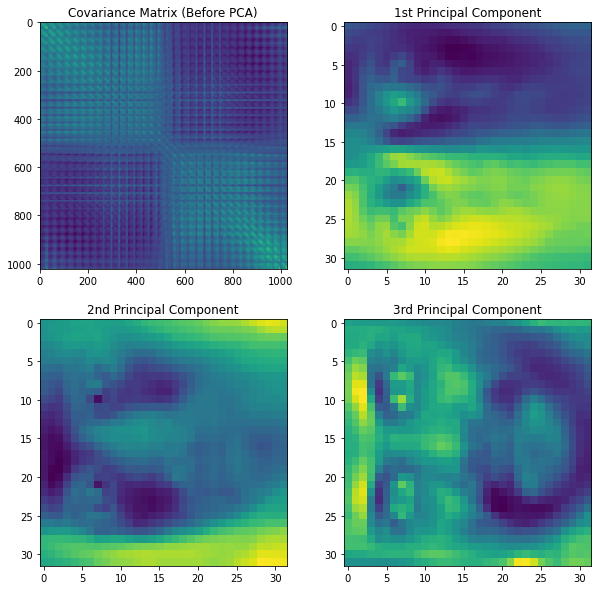

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to the data
pca = PCA(n_components=100)
pca.fit(df)

# Get the covariance matrix before dimensionality reduction
cov_before = np.cov(df.T)

# Get the covariance matrix after dimensionality reduction
data_pca = pca.transform(df)
cov_after = np.cov(data_pca.T)

# Plot the covariance matrices as heatmaps
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cov_before)
axs[0, 0].set_title('Covariance Matrix (Before PCA)')

axs[0, 1].imshow(pca.components_[0].reshape(32, 32))
axs[0, 1].set_title('1st Principal Component')

axs[1, 0].imshow(pca.components_[1].reshape(32, 32))
axs[1, 0].set_title('2nd Principal Component')

axs[1, 1].imshow(pca.components_[2].reshape(32, 32))
axs[1, 1].set_title('3rd Principal Component')

plt.show()


In [71]:

trali=[]
tesli=[]
for i in range(5):
    trali.append(pd.DataFrame(pca.transform(splittrain[i])))
    tesli.append(pd.DataFrame(pca.transform(splittest[i])))
    

In [72]:
%%time

for i in range(5):
    labels=KNNClassifier(3,trali[i] ,tesli[i] )
    y_test = np.array(y_test)
    labels=np.array(labels)
    # labels
    y_test = list(y_test)
    tcount = 0
    for j in range(len(labels)):
        if labels[j] == y_test[j]:
            tcount += 1
    print("accuracy of split ", i , ": ",(tcount / len(y_test))*100,"%")

accuracy of split  0 :  99.5 %
accuracy of split  1 :  92.5 %
accuracy of split  2 :  94.5 %
accuracy of split  3 :  99.5 %
accuracy of split  4 :  99.0 %
Wall time: 15min 1s


In [78]:
splittrain=[]
splittest=[]
for j in range(5):
    merged_df_train = pd.DataFrame()
    merged_df_test= pd.DataFrame()
    for i in range(10):
        temp_df=df[i*170:i*170+170]
        X_train,X_test= train_test_split(temp_df,test_size=(70/170),random_state=j)
        merged_df_train = pd.concat([merged_df_train, X_train])
        merged_df_test = pd.concat([merged_df_test, X_test])
        X_train = merged_df_train
        X_test = merged_df_test
    splittrain.append(X_train)
    splittest.append(X_test)

In [79]:

trali=[]
tesli=[]
for i in range(5):
    trali.append(pd.DataFrame(pca.transform(splittrain[i])))
    tesli.append(pd.DataFrame(pca.transform(splittest[i])))


In [81]:
y_train = pd.DataFrame(np.repeat(np.arange(10), 100))
y_test=   pd.DataFrame(np.repeat(np.arange(10), 70))
y_train.iloc[1]

0    0
Name: 1, dtype: int32

In [82]:
for i in range(5):
    labels=KNNClassifier(3,trali[i] ,tesli[i] )
    y_test = np.array(y_test)
    labels=np.array(labels)
    # labels
    y_test = list(y_test)
    tcount = 0
    for j in range(len(labels)):
        if labels[j] == y_test[j]:
            tcount += 1
    print("accuracy of split ", i , ": ",(tcount / len(y_test))*100,"%")

accuracy of split  0 :  98.14285714285714 %
accuracy of split  1 :  96.71428571428572 %
accuracy of split  2 :  96.0 %
accuracy of split  3 :  97.28571428571429 %
accuracy of split  4 :  95.0 %
